In [2]:
import pandas as pd
import pyarrow.parquet as pq
import numpy as np
import matplotlib.pyplot as plt
import vaex
%matplotlib inline

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
from utils import compute_R_fast
from utils import compute_R

#events = pd.read_parquet("../fbd/data/clean/intraday/SPY.P_2010.parquet")
#events.set_index("index",inplace=True)

## we may need to collapse trades with exactly the same (bid,ask,trade price) together to reduce computational load and make things easier
## often these trade are a result of one big trade being chunked

# available one liner to aggregate trades
#! events =  events.groupby(["bid","ask","trade.price"])["trade.volume"].aggregate(["idxmin","sum"]).reset_index().rename(columns={"sum":"trade.volume"})


#events= compute_trade_sign(events)

df = vaex.open("../data/clean/DOW/DOW-events_w_s.arrow")
events = df.to_pandas_df()



In [4]:
events

,trade_price,trade_volume,bid-price,bid-volume,ask-price,ask-volume,index,mid,s
0,27.993333,300.0,27.98,20.0,28.00,10.0,2010-01-04 14:30:03.362000128,27.990,1.0
1,28.006000,1100.0,27.98,16.0,28.03,5.0,2010-01-04 14:30:03.371999744,28.005,1.0
2,28.030000,400.0,27.98,16.0,28.03,3.0,2010-01-04 14:30:03.372999936,28.005,1.0
3,28.030000,300.0,28.02,4.0,28.05,1.0,2010-01-04 14:30:03.393999872,28.035,-1.0
4,28.050000,100.0,28.02,1.0,28.07,1.0,2010-01-04 14:30:03.403000064,28.045,1.0
...,...,...,...,...,...,...,...,...,...
1311469,34.150000,300.0,34.14,167.0,34.15,18.0,2010-12-31 20:59:57.248999680,34.145,1.0
1311470,34.150000,180.0,34.14,102.0,34.15,17.0,2010-12-31 20:59:57.257999872,34.145,1.0
1311471,34.150000,629.0,34.14,99.0,34.15,11.0,2010-12-31 20:59:57.320999936,34.145,1.0
1311472,34.150000,850.0,34.14,92.0,34.15,50.0,2010-12-31 20:59:58.225000192,34.145,1.0


In [5]:
arr = compute_R_fast(events, 100)

/home/lucastrg/FLEP/MA3/Financial_Big_Data/behavioural-trading/utils.py:60: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return np.array(response_function[:cutoff].values)


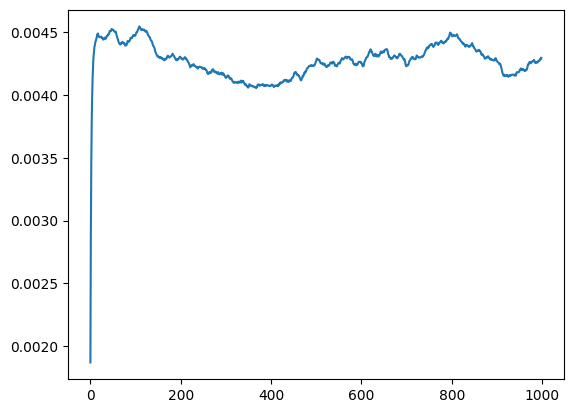

In [6]:
arr.shape
plt.plot(arr[1:])

In [126]:
events["unit_digit"]=(events.trade_price+0.5).astype(int)%10

In [127]:
events["trade_sign"] = pd.Categorical(events["s"])

In [128]:
import seaborn as sns

In [129]:
events[events["s"]==0]

,trade_price,trade_volume,bid-price,bid-volume,ask-price,ask-volume,index,mid,s,unit_digit,trade_sign


In [130]:
oui = events.groupby(["trade_sign","unit_digit"]).apply(lambda x : compute_R_fast(x,tau_max=1000))
df = pd.pivot_table(oui.apply(pd.Series),columns=oui.index)


/home/lucastrg/FLEP/MA3/Financial_Big_Data/behavioural-trading/utils.py:64: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return np.array(response_function[:cutoff].values)


In [131]:
df

,"(-1.0, 0)","(-1.0, 1)","(-1.0, 2)","(-1.0, 3)","(-1.0, 4)","(-1.0, 5)","(-1.0, 6)","(-1.0, 7)","(-1.0, 8)","(-1.0, 9)","(1.0, 0)","(1.0, 1)","(1.0, 2)","(1.0, 3)","(1.0, 4)","(1.0, 5)","(1.0, 6)","(1.0, 7)","(1.0, 8)","(1.0, 9)"
0,-1.260603e-12,3.400366e-12,4.414817e-13,1.838049e-12,5.810256e-13,-1.998875e-13,-1.092460e-12,1.205803e-12,-2.055074e-12,-5.786499e-13,1.347379e-12,1.260254e-12,5.957795e-13,-4.469097e-13,5.234609e-14,-7.337331e-13,2.778329e-12,8.396437e-13,-1.498390e-12,-8.579587e-13
1,-1.076847e-05,-7.662918e-06,-3.591875e-05,-3.538235e-04,-1.926432e-04,9.133234e-08,-1.419001e-07,2.642327e-07,-5.928309e-06,-1.736203e-05,1.250048e-05,7.879412e-06,3.637361e-05,3.999040e-04,1.987696e-04,1.710636e-04,2.778356e-12,5.464147e-08,6.528892e-06,1.761199e-05
2,-2.123641e-05,-1.521332e-05,-7.092845e-05,-7.074930e-04,-3.852943e-04,3.653366e-07,-2.838018e-07,4.756229e-07,-1.165916e-05,-3.410774e-05,2.500127e-05,1.575900e-05,7.274987e-05,8.006399e-04,3.975473e-04,3.422279e-04,-4.772947e-08,8.196192e-07,1.265823e-05,3.504398e-05
3,-3.188507e-05,-2.265120e-05,-1.055760e-04,-1.061008e-03,-5.770401e-04,4.566792e-07,-4.730067e-07,3.699331e-07,-1.732429e-05,-5.103030e-05,3.724856e-05,2.363877e-05,1.089460e-04,1.200608e-03,5.963331e-04,5.124552e-04,-9.546262e-08,1.639256e-06,1.865448e-05,5.039922e-05
4,-4.253399e-05,-3.008925e-05,-1.396791e-04,-1.414549e-03,-7.724460e-04,5.480251e-07,-6.622152e-07,2.642411e-07,-2.410940e-05,-6.804160e-05,4.949616e-05,3.151872e-05,1.445964e-04,1.601608e-03,7.957402e-04,6.826889e-04,-9.546352e-08,2.732122e-06,2.358490e-05,6.566468e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-8.811359e-03,-6.447091e-04,-3.039805e-02,-3.782739e-01,-2.015268e-01,-2.412792e-03,6.361553e-04,-1.195471e-03,-3.230481e-03,-1.173057e-02,9.837153e-03,1.814302e-03,2.991692e-02,4.256919e-01,2.043079e-01,4.855091e-03,-5.951348e-04,1.324340e-03,2.709264e-03,1.262305e-02
996,-8.819930e-03,-6.445455e-04,-3.042871e-02,-3.786784e-01,-2.017371e-01,-2.407349e-03,6.383101e-04,-1.197780e-03,-3.227520e-03,-1.174020e-02,9.845762e-03,1.809991e-03,2.993418e-02,4.261426e-01,2.045129e-01,4.857107e-03,-5.970200e-04,1.324300e-03,2.707546e-03,1.262807e-02
997,-8.828501e-03,-6.443819e-04,-3.045957e-02,-3.790828e-01,-2.019474e-01,-2.401998e-03,6.404649e-04,-1.200143e-03,-3.225027e-03,-1.174983e-02,9.854436e-03,1.805623e-03,2.995144e-02,4.265933e-01,2.047179e-01,4.859508e-03,-5.989051e-04,1.324204e-03,2.705759e-03,1.263290e-02
998,-8.837072e-03,-6.439903e-04,-3.049043e-02,-3.794879e-01,-2.021579e-01,-2.396647e-03,6.426198e-04,-1.201972e-03,-3.222267e-03,-1.175937e-02,9.863111e-03,1.801197e-03,2.996889e-02,4.270438e-01,2.049225e-01,4.861333e-03,-6.005012e-04,1.324108e-03,2.704243e-03,1.263764e-02


<AxesSubplot: >

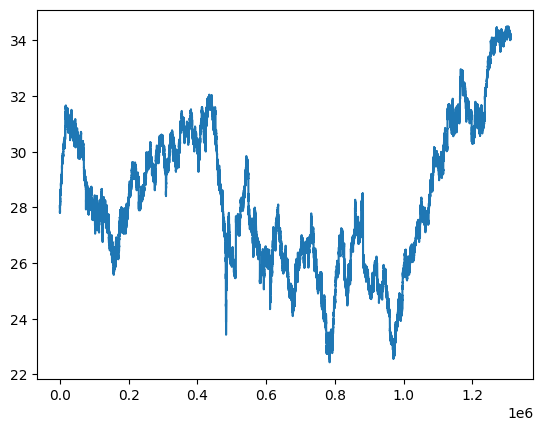

In [132]:
events.trade_price.plot()

In [133]:
events.groupby(["trade_sign", "unit_digit"]).size()

trade_sign  unit_digit
-1.0        0              83114
            1              88740
            2              27424
            3              27868
            4              49289
            5              54746
            6             105710
            7              94615
            8              75908
            9              56734
1.0         0              78798
            1              87571
            2              27356
            3              25007
            4              48927
            5              52993
            6             104753
            7              91508
            8              75052
            9              55361
dtype: int64

In [147]:
events.trade_sign = pd.Categorical(events["s"].apply(lambda x : "BUY" if x==1 else "SELL"))


In [148]:
oui = events.groupby(["trade_sign","unit_digit"]).apply(lambda x : compute_R_fast(x,tau_max=1000))
df = pd.pivot_table(oui.apply(pd.Series),columns=oui.index)


/home/lucastrg/FLEP/MA3/Financial_Big_Data/behavioural-trading/utils.py:60: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  #print("response", response_function)


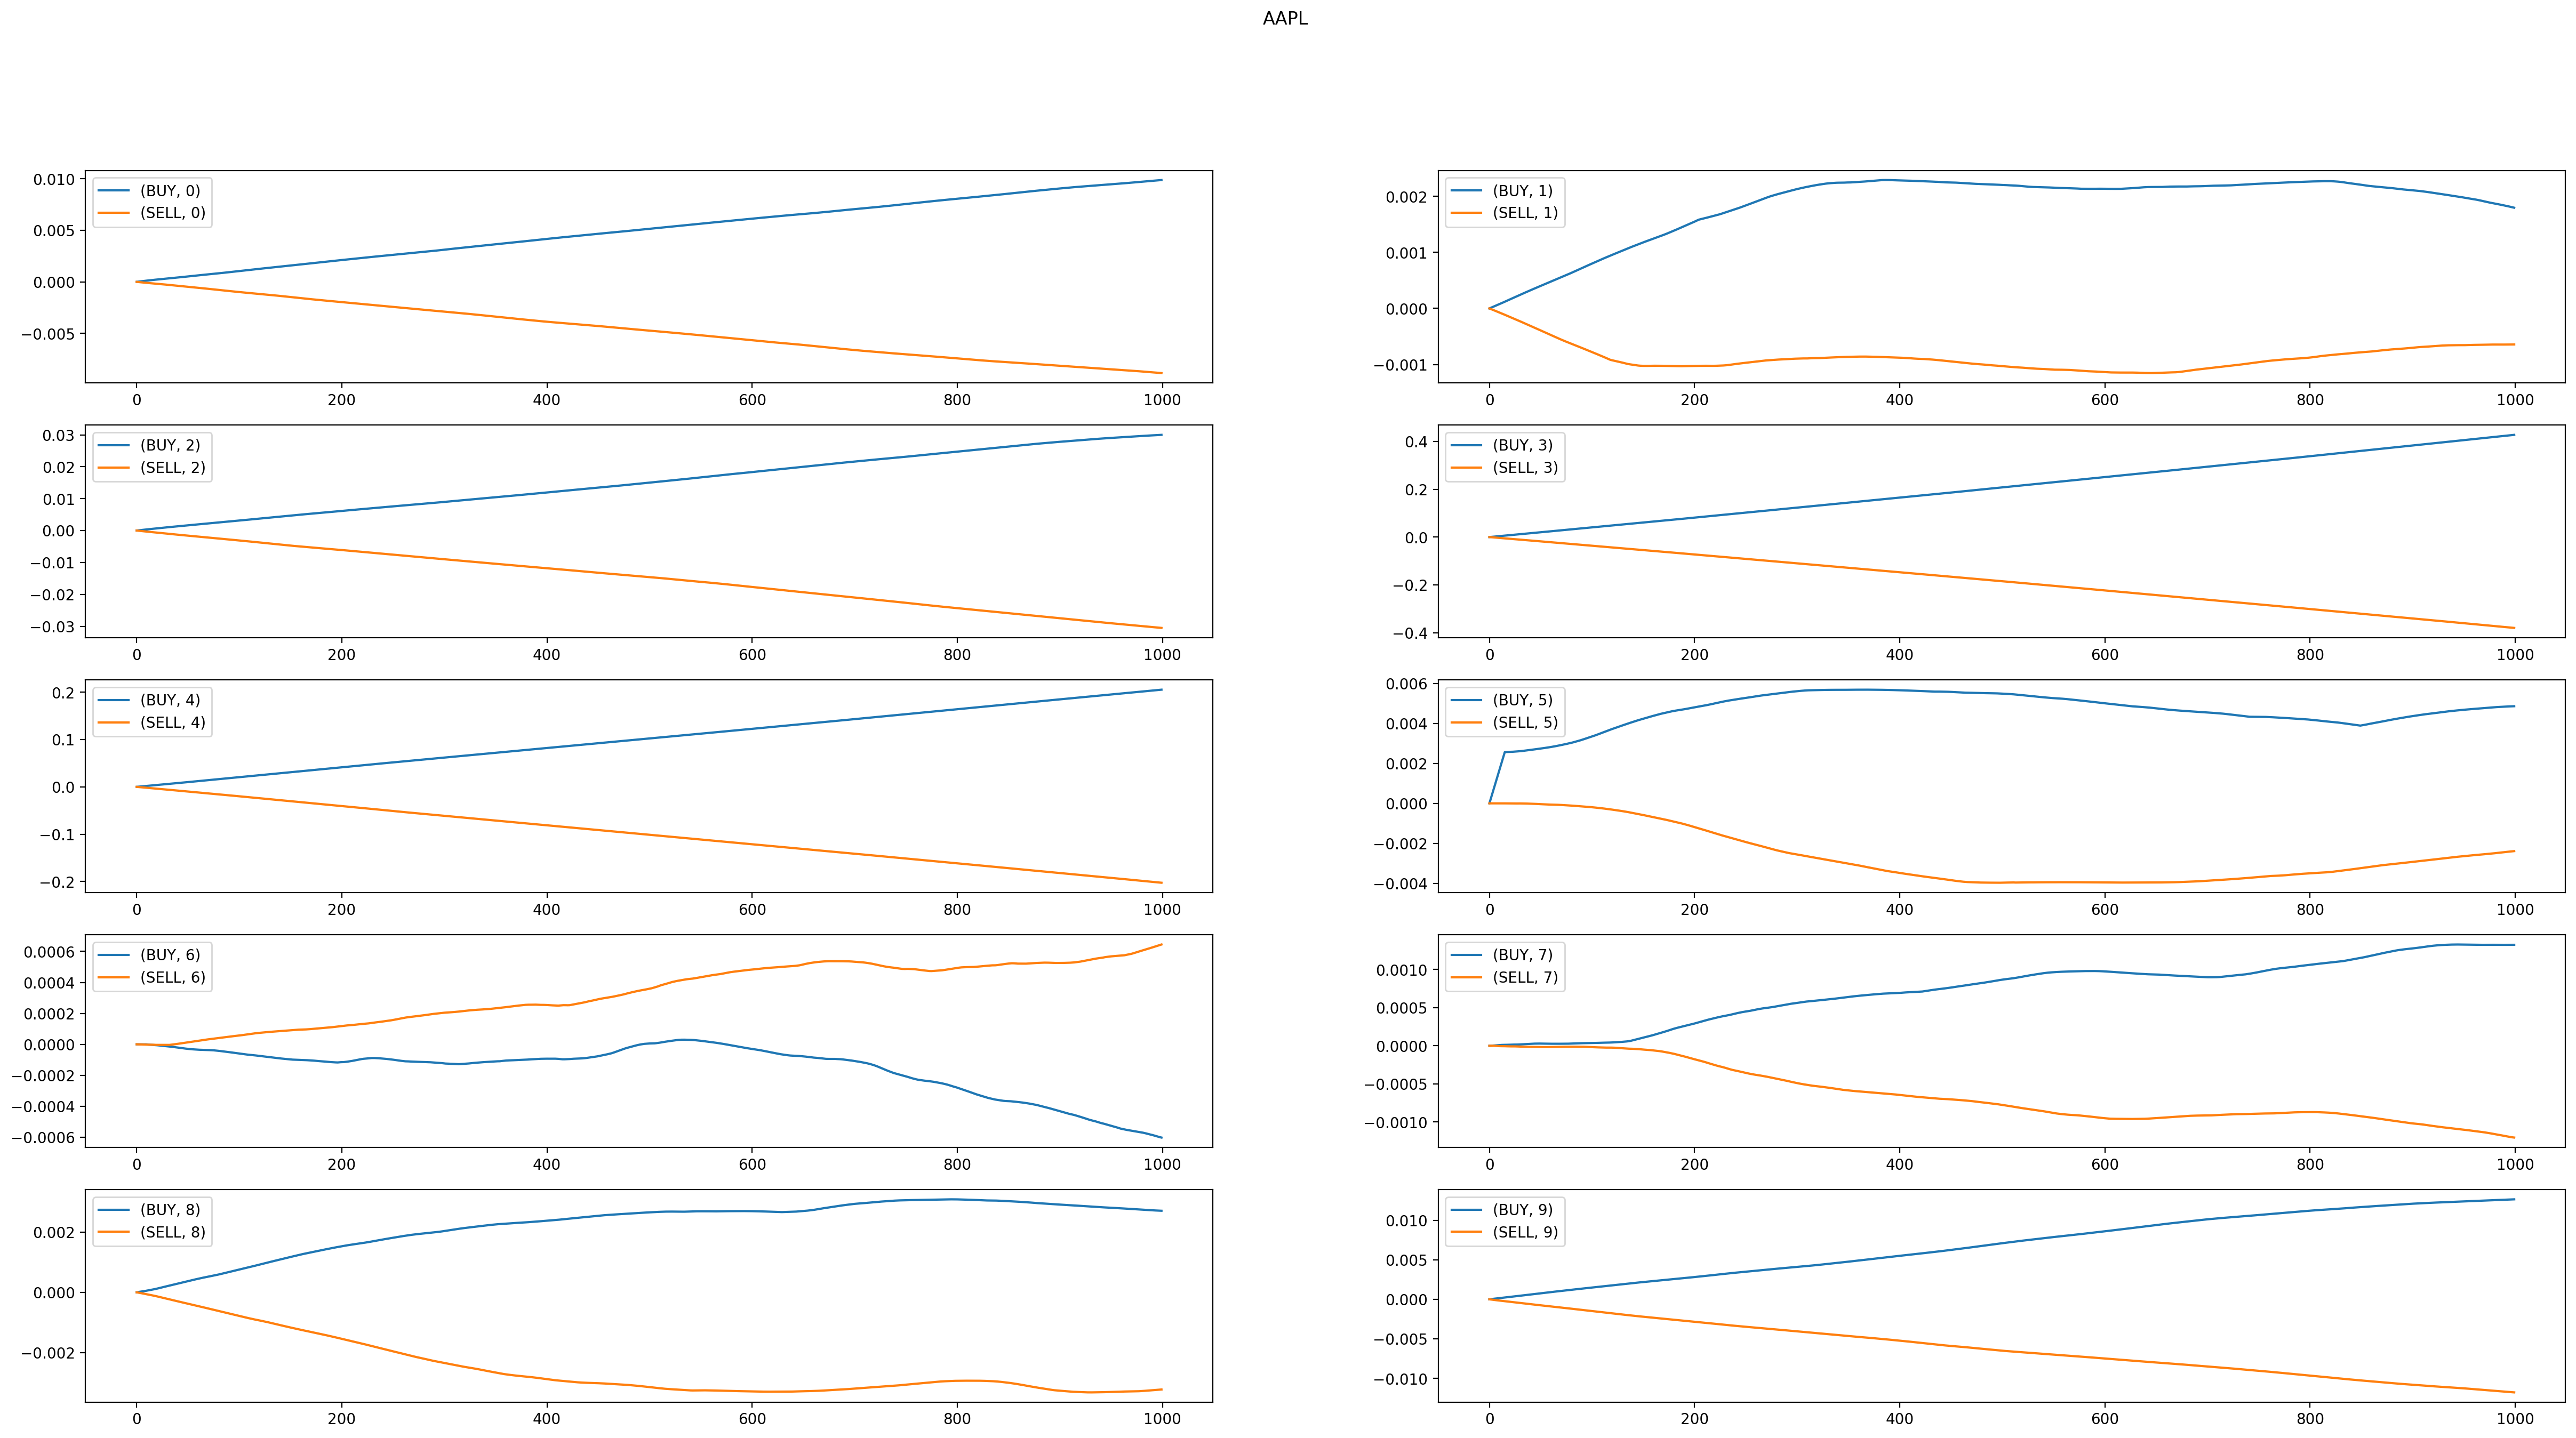

In [155]:
f,a = plt.subplots(5,2, figsize=(30,15), dpi=200)

for i,ax in zip(range(10),a.flatten()):
    
    df.iloc[:,0+i::10].plot(ax=ax)
    f.suptitle("AAPL unit digit response function")


TypeError: Setting a MultiIndex dtype to anything other than object is not supported

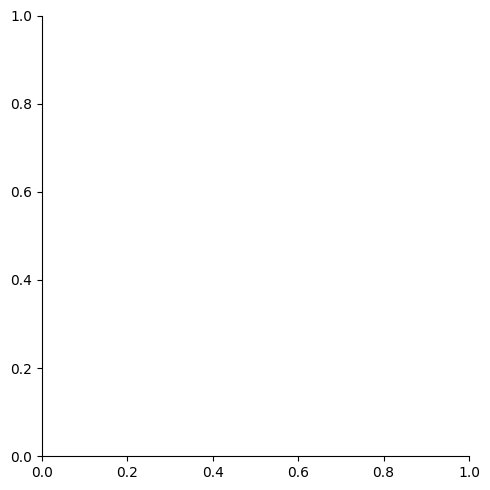

In [97]:
sns.catplot(df)

<AxesSubplot: >

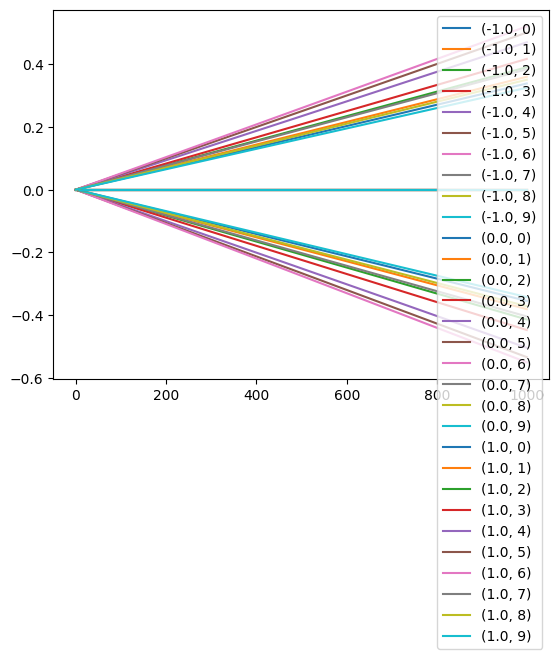

In [ ]:
df.plot()

In [ ]:
from utils import compute_R

date05=pd.Timestamp(2010,5,5)
date06=pd.Timestamp(2010,5,6)
date07=pd.Timestamp(2010,5,7)

events_05=events[events.index.date==date05.date()]
events_06=events[events.index.date==date06.date()]
events_07=events[events.index.date==date07.date()]

R_05=compute_R(events_05)
R_06=compute_R(events_06)
R_07=compute_R(events_07)

plt.plot(R_05,label="05")
plt.plot(R_06,label="06")
plt.plot(R_07,label="07")
plt.show()

AttributeError: 'RangeIndex' object has no attribute 'date'

<AxesSubplot:>

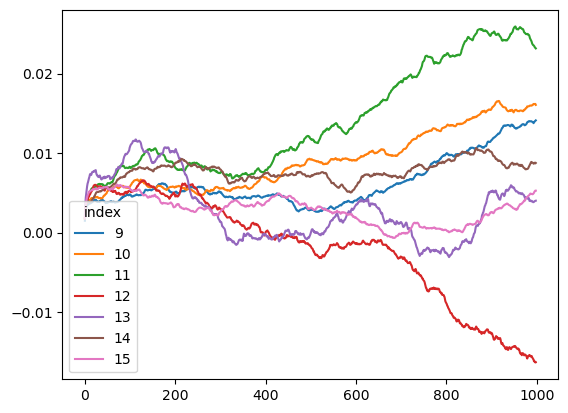

In [ ]:
R_05_hour=events_05[["s","mid"]].groupby(events_05.index.hour).apply(compute_R)
pd.pivot_table(R_05_hour.apply(pd.Series),columns=R_05_hour.index).plot()